# Trabajo Practico Matematica III #

## Analisis de datos ##

La idea de este trabajo practico es el analisis de datos del siguiente archivo con formato .csv  -> **`corredores.csv`**.  

El nombre original del archivo era **`categorías de corredores.csv`** pero fue cambiado para acomodarse con la tarea en cuestion.  

Antes de iniciar con todo el analisis, es necesario importar todos los modulos necesarios para el trabajo.  

*tambien se desactivaron los warnings, de todas formas en los momentos en los que llegue a ocurrir algo indeceado será mencionado*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.impute import SimpleImputer
import seaborn as sns
from module import dataFrameFunctions as dff
import warnings
%matplotlib inline
#warnings.filterwarnings(action='ignore')

Procedemos a incorporar en el proyecto un *dataFrame* de los corredores y visualizamos los primeros 5 elementos, solamente para ver como se ve el *dataFrame*

In [2]:
dfCorredores = pd.read_csv('corredores.csv')
dfCorredores

,Unnamed: 0,place,gender,age,home,time,Velocidad
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...,...
995,15972,16261,Male,61,FRA,285.883333,Regular
996,1090,1131,Male,37,GBR,191.916667,Veloz
997,16419,16713,Female,53,IRL,289.016667,Regular
998,13977,14241,Female,21,NY,276.050000,Regular


Vemos que hay una columna sin nombre. Para solucionar esto cambiaremos el nombre y haremos algunas modificaciones para mejorar la prolijidad y presentación

In [3]:
dfCorredores.rename(columns={
    'Unnamed: 0':'ID',
    'place':'Place',
    'gender':'Gender',
    'age':'Age',
    'home':'Home',
    'time':'Time',
    'Velocidad':'Velocity'},
    inplace=True)

Una vez hecho esto, lo que haremos es hacer un display de los primeros y ultimos 15 corredores, para poder tener una vision general de los datos

In [4]:
dfCorredores.head(n=15)

,ID,Place,Gender,Age,Home,Time,Velocity
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
5,1720,1784,Male,40,NJ,201.966667,Regular
6,15736,16020,Female,30,CA,283.566667,Regular
7,10580,10805,Male,27,GBR,255.883333,Regular
8,11957,12201,Male,42,NED,264.250000,Regular
9,18933,19266,Male,48,B.C,306.683333,Lento


In [5]:
dfCorredores.tail(n=15)

,ID,Place,Gender,Age,Home,Time,Velocity
985,20530,20877,Male,29,SUI,324.666667,Lento
986,13981,14245,Male,40,MA,273.700000,Regular
987,13190,13446,Female,37,IN,267.633333,Regular
988,1038,1079,Male,40,NED,191.316667,Veloz
989,13752,14013,Male,49,ITA,273.033333,Regular
990,23273,23645,Female,46,NY,501.550000,Lento
991,15901,16189,Female,51,TN,285.350000,Regular
992,14889,15162,Female,50,GER,278.116667,Regular
993,11547,11784,Female,40,NY,263.383333,Regular
994,4079,4206,Male,27,CAN,223.333333,Regular


## Analisis de las columnas

- ID - id del corredor
- Place - posicion del corredor
- Gender - genero del corredor
- Age - edad del corredor
- Home - pais del corredor
- Time - tiempo total en completar la carrera
- Velocity - velocidad en la que fueron

Una cosa que se ve es que la velocidad del corredor es dependiente del tiempo que tardo en completar la carrera.  

- Si el corredor tuvo un **tiempo mayor o igual a 300**, es considerado **Lento**  
- Si el corredor tuvo un **tiempo mayor o igual a 200**, es considerado **Regular**  
- Si el corredor tuvo un **tiempo menor a 200**, es considerado **Veloz**

## Analisis de los datos

Por lo que se puede apreciar, ahora podemos hacer, por ejemplo un describe de las columnas que presenta el *dataFrame*

### Describe()

In [6]:
dfCorredores.describe()

,ID,Place,Age,Time
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,11763.113000,11992.319000,39.100000,268.570700
std,6761.839631,6858.858466,10.675391,53.550743
min,53.000000,54.000000,5.000000,147.333333
25%,5936.000000,6095.000000,31.000000,233.775000
50%,11722.000000,11962.000000,38.000000,262.841667
75%,17600.500000,17921.750000,46.000000,294.854167
max,23290.000000,23662.000000,81.000000,566.783333


### Shape

In [7]:
dfCorredores.shape

(1000, 7)

### NaN o Null

Corroboremos si es que existe algunos datos *nulos* o *NaN* en el *dataFrame*

In [8]:
dfCorredores.isnull().any()

ID          False
Place       False
Gender      False
Age         False
Home         True
Time        False
Velocity    False
dtype: bool

Como existen algunos datos nulos vamos a proceder a sacarlos de la lista

In [9]:

dfCorredores = dfCorredores.dropna(axis=0,how='any')
dfCorredores

,ID,Place,Gender,Age,Home,Time,Velocity
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...,...
995,15972,16261,Male,61,FRA,285.883333,Regular
996,1090,1131,Male,37,GBR,191.916667,Veloz
997,16419,16713,Female,53,IRL,289.016667,Regular
998,13977,14241,Female,21,NY,276.050000,Regular


Corroboro que no existen datos nulos

In [10]:
dfCorredores.isnull().any()

ID          False
Place       False
Gender      False
Age         False
Home        False
Time        False
Velocity    False
dtype: bool

# Analisis en Pandas

Antes de llegar a hacer un analisis utilizando librerias como skylearn, vamos a trabajar con lo que ya tenemos.

## Vista previa antes prediccion de datos

Ahora vamos a hacer un avistamientos de estos datos extrallendo cosas que nos resulten interesantes

### Cantidad de competidores segun su velocidad

Tomaremos la cantidad de competidores segun la velocidad a la que fueron clasificadas en la carrera

In [11]:
"""
Utilizaremos un modulo llamado Modules.
Esta es un modulo personalizado para tomar funciones directamente de sus paquetes
El que utilizaremos se llama dataFrameFunctions que tiene funciones que se aplican directamente a una serie o un dataFrame
---------------------------------------------------------------------------------------------------------------------------
Ahora, la funcion que usaremos se llama countValuesInSerie, que nos devolvera la cantidad de elementos de una serie
tomando en cuenta las veces que aparesca en la serie.
Ya la fución se encuentra documentada, si desea corroborar al contenido puede entrar directamente al documento en cuestion
---------------------------------------------------------------------------------------------------------------------------
Tomaremos la cantidad de corredores dependiendo de si fueron veloces, lentos o regulares
"""
corredoresVeloces = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Veloz')
corredoresLentos = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Lento')
corredoresRegulares = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Regular')

"""
Acá estoy colocando estos datos en un array de numpy. 
Esto lo vamos a usar mas adelante
lo definimos de tipo int16 porque el tamaño de los datos no son muy grandes, podemos permitirlo
"""
cantCorredoresVelocidad = np.array([corredoresVeloces,corredoresRegulares,corredoresLentos], dtype='int16')
cantCorredoresVelocidad

array([ 68, 719, 212], dtype=int16)

Como podemos ver, tenemos los datos de la cantidad de corredores separados por su categoria de velocidad.  
Veamoslo esto en un grafico.

In [67]:
dfcantCorredoresVelocidad = pd.DataFrame(data=cantCorredoresVelocidad,index=['Veloz','Regular','Lento'],columns=['Categoria de Corredores'])
dfcantCorredoresVelocidad

,Categoria de Corredores
Veloz,68
Regular,719
Lento,212


<AxesSubplot: >

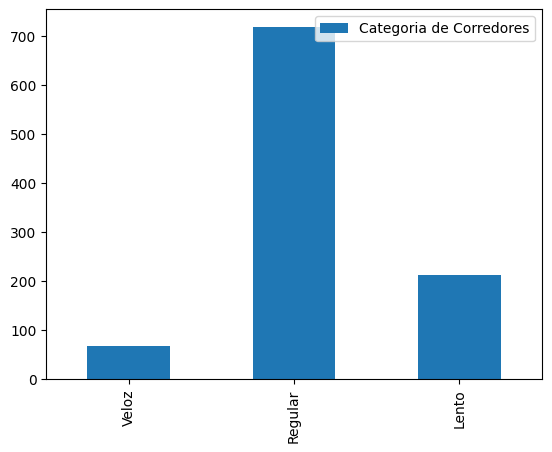

In [78]:
dfcantCorredoresVelocidad.plot.bar()

----------------------------------------------------------------------------------------------------------------------------------------------------

## Matriz de correlación  

Ahora procedamos a crear una matriz de correlación entre los datos del *dataFrame* :rage3:

In [80]:
corrCorredores = dfCorredores.corr()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_1036\4294091214.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrCorredores = dfCorredores.corr()


Corroboramos la integridad de los datos obtenidos

In [81]:
corrCorredores

,ID,Place,Age,Time
ID,1.000000,0.999997,0.150861,0.929486
Place,0.999997,1.000000,0.150719,0.929348
Age,0.150861,0.150719,1.000000,0.192934
Time,0.929486,0.929348,0.192934,1.000000


<AxesSubplot: >

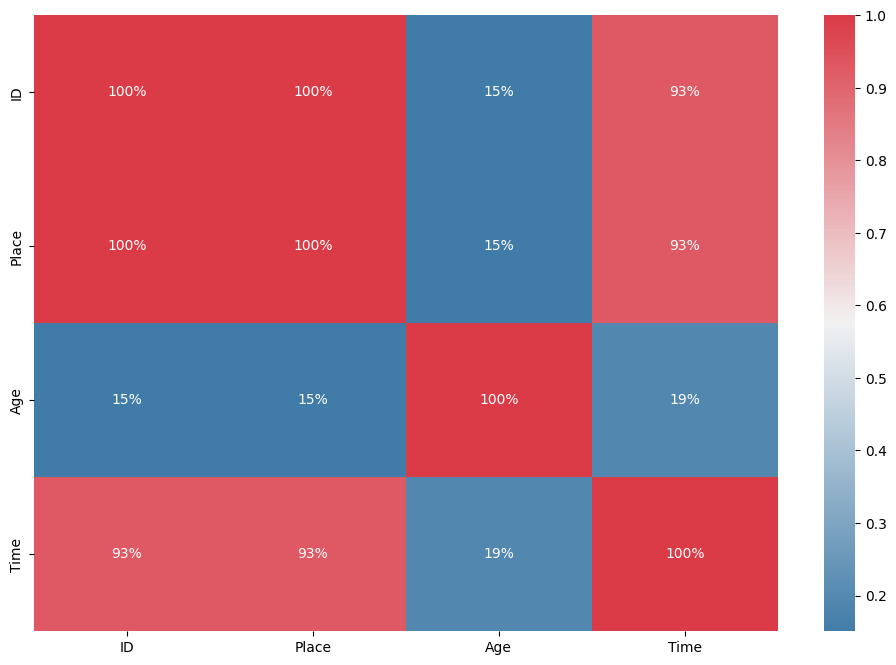

In [82]:
plt.subplots(figsize=(12,8))
sns.heatmap(corrCorredores, xticklabels=corrCorredores.columns, yticklabels=corrCorredores.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

Podemos observar que se perdieron algunas columnas.
Debido a esto, necesitaremos una forma de transformar los datos de estas columnas en algo manejable.  

De todas formas vale aclarar que para esto en especifico se creara una variable aparte que se usara para este caso. Hay ciertos datos de esta tabla que luego seran utilizados para analisis predictivo, por lo que no necesitaremos de este dato mas adelante.

### Matriz de correlacion - Cambio de datos del Corr

In [83]:
dfCorrCorredores = dfCorredores.copy()
dfCorrCorredores['Home']=dfCorrCorredores['Home'].astype('category').cat.codes
dfCorrCorredores['Velocity']=dfCorrCorredores['Velocity'].astype('category').cat.codes
dfCorrCorredores['Gender']=dfCorrCorredores['Gender'].astype('category').cat.codes
del dfCorrCorredores['ID']


In [84]:
dfCorrCorredores.head(15)

,Place,Gender,Age,Home,Time,Velocity
0,3592,1,52,23,217.483333,1
1,13853,0,40,50,272.550000,1
2,12256,1,31,20,265.283333,1
3,10457,0,33,41,256.150000,1
4,9686,1,33,50,252.250000,1
5,1784,1,40,47,201.966667,1
6,16020,0,30,9,283.566667,1
7,10805,1,27,23,255.883333,1
8,12201,1,42,45,264.250000,1
9,19266,1,48,5,306.683333,0


In [85]:
corrCorredores = dfCorrCorredores.corr()
corrCorredores

,Place,Gender,Age,Home,Time,Velocity
Place,1.000000,-0.221553,0.150719,0.038065,0.929348,-0.785848
Gender,-0.221553,1.000000,0.221560,-0.051819,-0.196857,0.163787
Age,0.150719,0.221560,1.000000,-0.079944,0.192934,-0.096890
Home,0.038065,-0.051819,-0.079944,1.000000,0.031799,-0.007077
Time,0.929348,-0.196857,0.192934,0.031799,1.000000,-0.813946
Velocity,-0.785848,0.163787,-0.096890,-0.007077,-0.813946,1.000000


<AxesSubplot: >

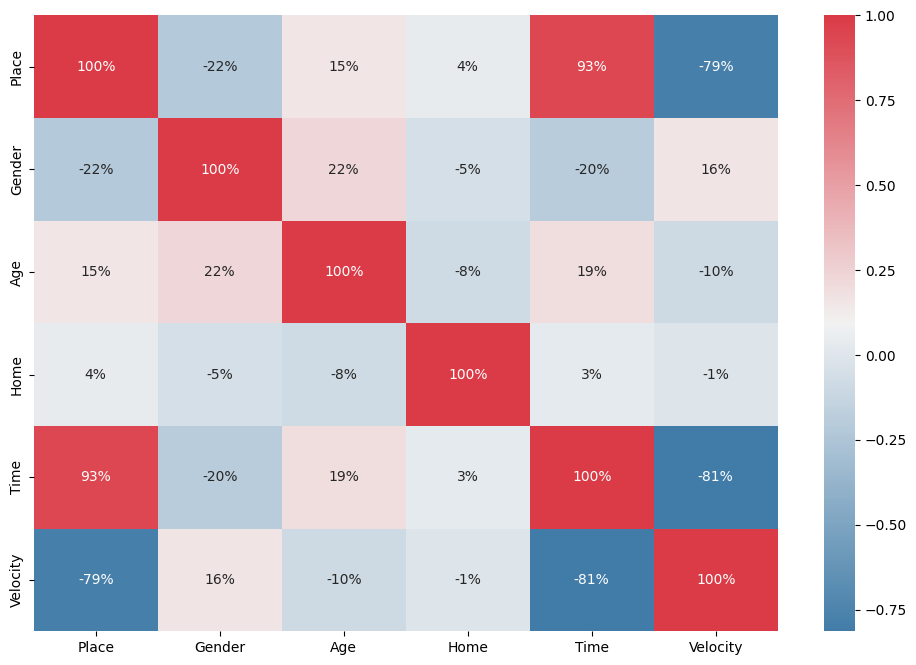

In [86]:

plt.subplots(figsize=(12,8))
sns.heatmap(corrCorredores, xticklabels=corrCorredores.columns, yticklabels=corrCorredores.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

In [87]:
corrCorredores['Place'].abs().sort_values(ascending=False)

Place       1.000000
Time        0.929348
Velocity    0.785848
Gender      0.221553
Age         0.150719
Home        0.038065
Name: Place, dtype: float64

Text(0.5, 0, 'Velocidad promedio de los corredores')

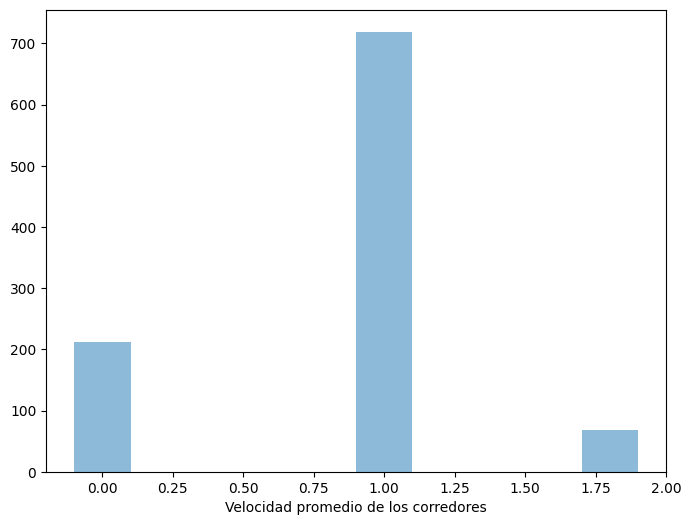

In [88]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.hist(dfCorrCorredores.Velocity,align='left',alpha=0.5)
ax1.set_xlabel('Velocidad promedio de los corredores')
